In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Zaczniemy od pracy na ładnym syntetycznym zbiorze danych:

In [2]:
data = pd.read_csv("data/synthetic-1.csv").values

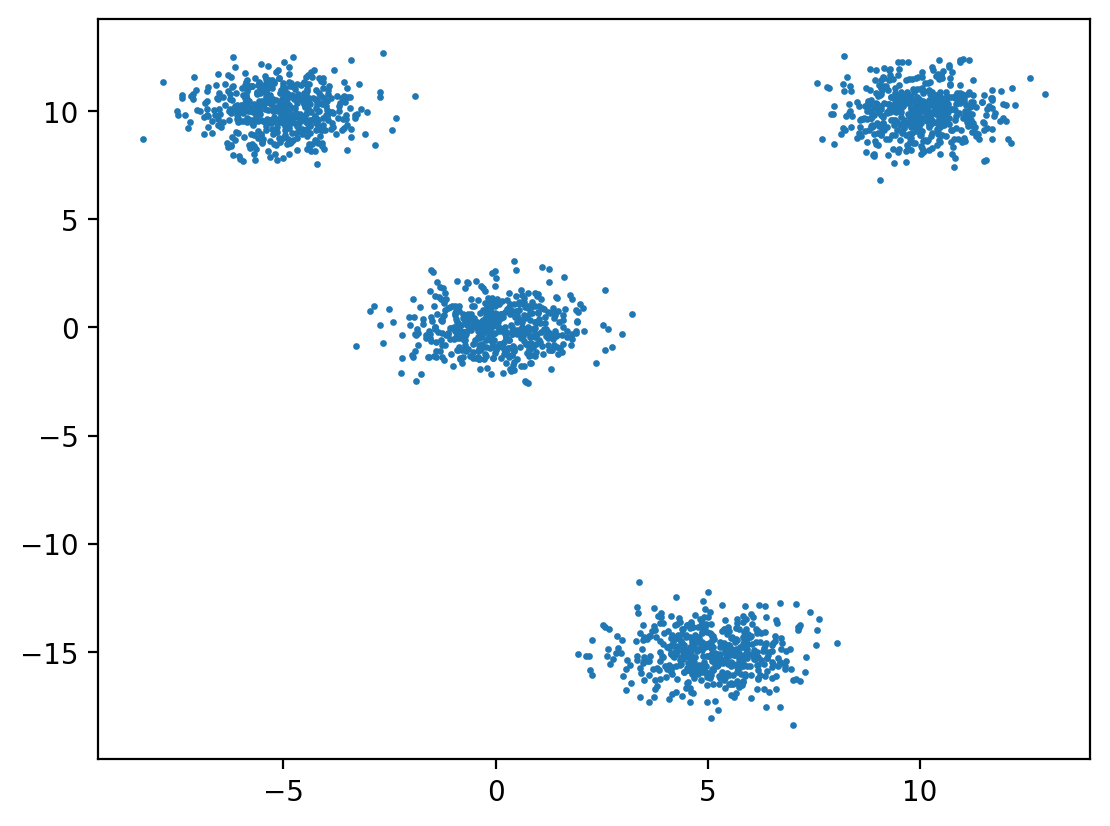

In [5]:
plt.scatter(data[:,0],data[:,1],s=2)

### Zadanie
Chcemy zrobić klasteryzację na zbiorze "synthetic-1.csv".

1. Zaimplementuj naiwny algortym wyliczający K-średnie
2. Przetestuj jego działanie uruchamiając go kilka razy, tak by początkowa inicjalizacja była inna. Wyniki zwizualizuj za pomocą scatter-plot'a z kolorowymi kategoriami:

```python
plt.scatter(data[:, 0], data[:, 1], 2, c=clusters, cmap="Dark2")
```

Wskazówki:

Losowanie centroidu jako punktu z danych: `np.random.choice`

Wyznaczanie dystansu od punktu do każdego z centroidów: Euclidean distance (odległość euklidesowa) `np.linalg.norm`

Wybranie centroidu o minimalnym dystansie: `np.argmin`

In [23]:
def kmeans(k: int, points: np.array) -> np.array:
    centroids = init_centroids(k, points)
    splitting = [(p, assign(p, centroids)) for p in points]
    while True:
        centroids = compute_centroids(splitting, k)
        new_splitting = [(p, assign(p, centroids)) for p, _ in splitting]
        if splitting == new_splitting:
            break
        else:
            splitting = new_splitting
            
    return np.array([c for _, c in splitting])

### Funkcja init_centroids

In [6]:
np.random.choice(range(len(data)),4)

array([1205,  974, 1923, 1455])

In [7]:
def init_centroids(k,points):
    ixs = np.random.choice(range(len(data)),k)
    return points[ixs]


In [11]:
c0 = init_centroids(4,data)

In [12]:
c0

array([[  5.83314422, -14.61843843],
       [ -5.01324942,  10.25596138],
       [ -4.35485389,   9.58450139],
       [ -4.42413167,  10.43784164]])

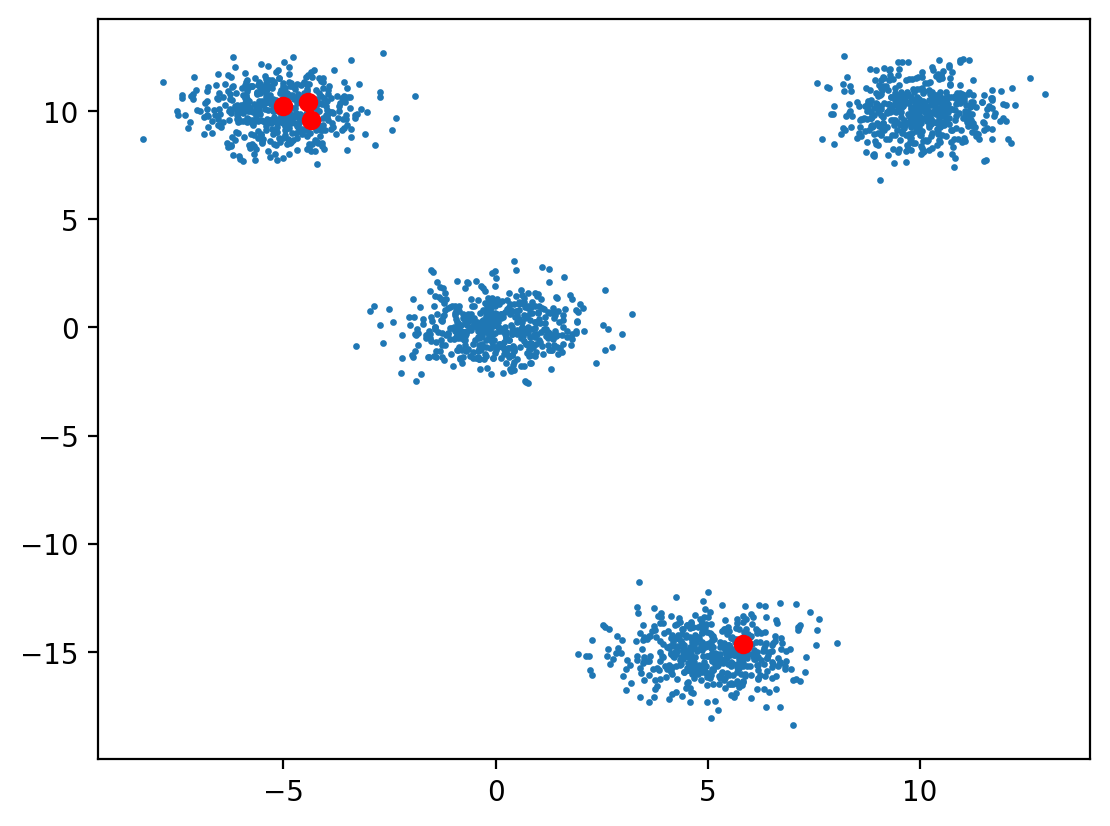

In [13]:
plt.scatter(data[:,0],data[:,1],s=2)
plt.scatter(c0[:,0],c0[:,1],c='red')

### Funkcja assign

In [14]:
def assign(p, centroids):
    return np.argmin(np.linalg.norm(centroids - p, axis=1))

In [15]:
s0 = [(p,assign(p,c0)) for p in data]

In [19]:
s0[:,0]

TypeError: list indices must be integers or slices, not tuple

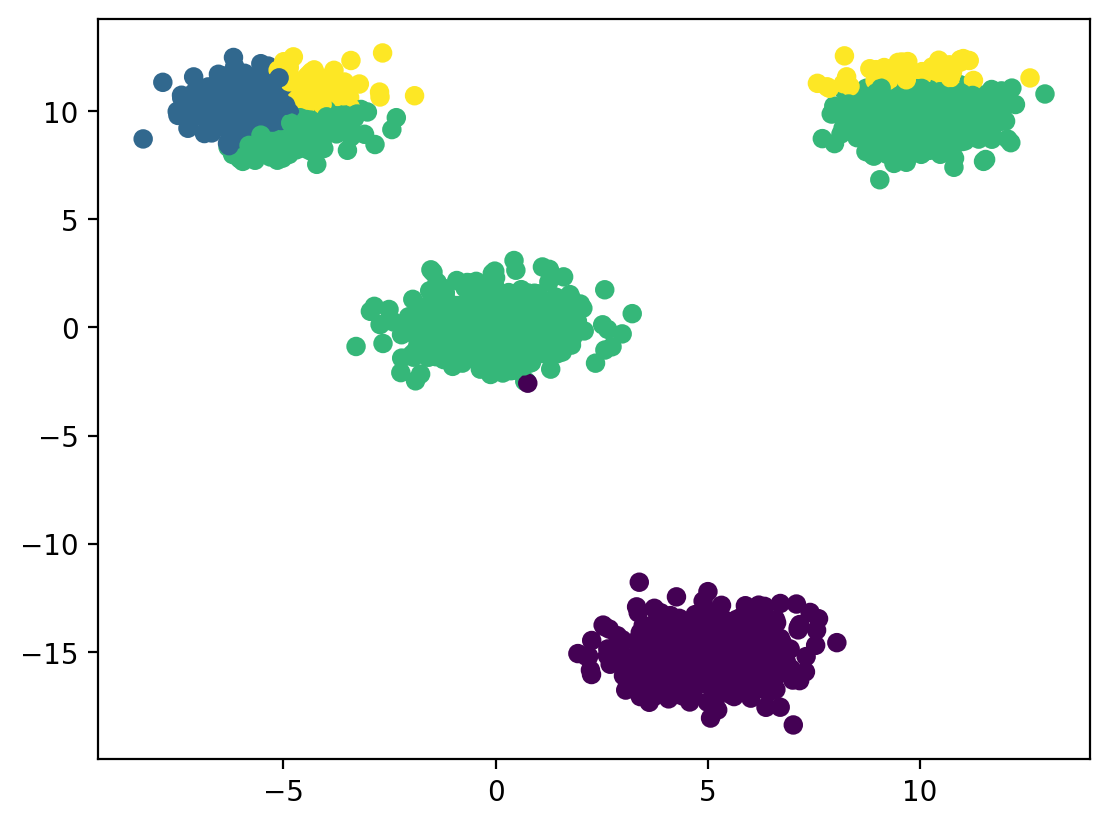

In [21]:
plt.scatter(data[:,0],data[:,1],c=[c for _,c in s0 ])

### Funkcja compute_centroids

In [22]:
def compute_centroids(splitting,k):
    centroids = []
    for c in range(k):
        ps = [p for p,i in splitting if i==c]
        centroids.append(sum(ps)/len(ps))
    return np.array(centroids)

### Wywołanie funkcji i wizualizacja

In [24]:
cs = kmeans(4, data)

In [25]:
cs

array([2, 3, 1, ..., 3, 2, 0], dtype=int64)

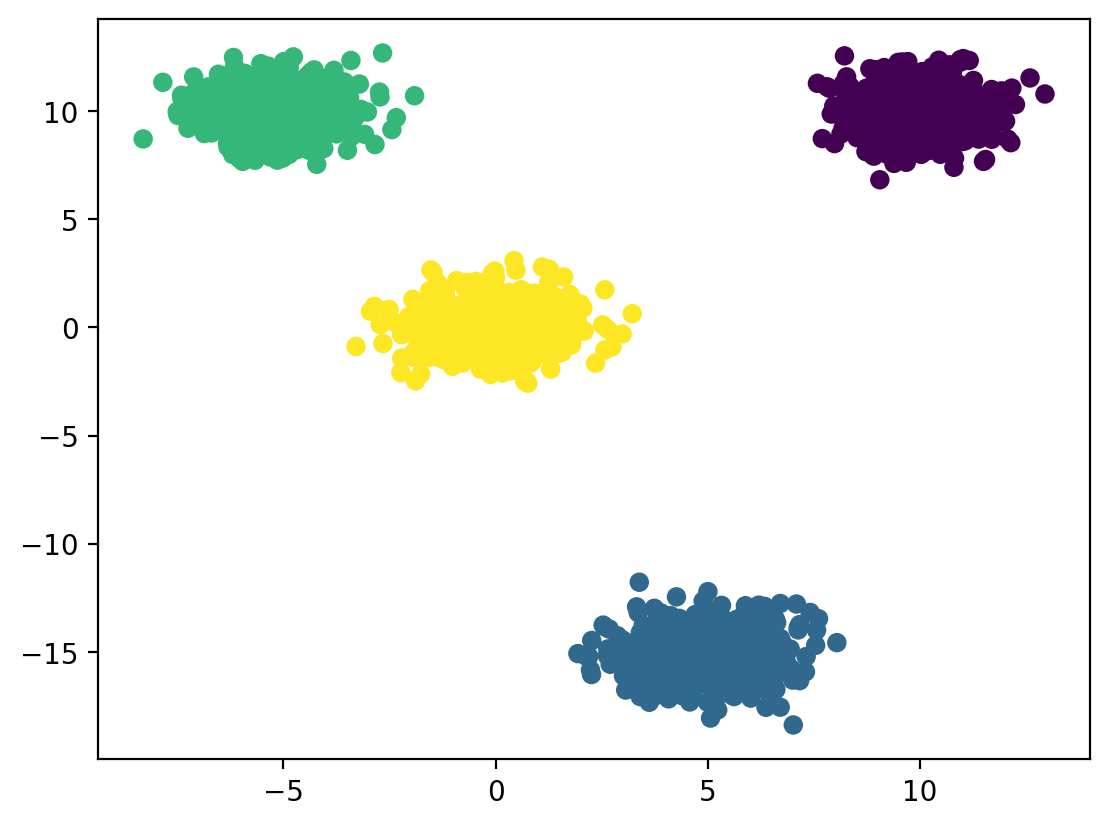

In [26]:
plt.scatter(data[:,0],data[:,1],c=cs)

### Zadanie

Wyznacz klastry korzystając z [sklearn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [27]:
from sklearn.cluster import KMeans

In [28]:
km1=KMeans(4,n_init=10,init='random')

In [29]:
km1.fit(data)

KMeans(init='random', n_clusters=4, n_init=10)

In [30]:
km1.cluster_centers_

array([[ 1.00059591e+01,  9.99598627e+00],
       [-1.02478188e-02, -1.81963269e-02],
       [ 5.06456375e+00, -1.50389014e+01],
       [-5.10835124e+00,  1.00221426e+01]])

In [31]:
cl = km1.predict(data)

In [32]:
cl

array([3, 1, 2, ..., 1, 3, 0])

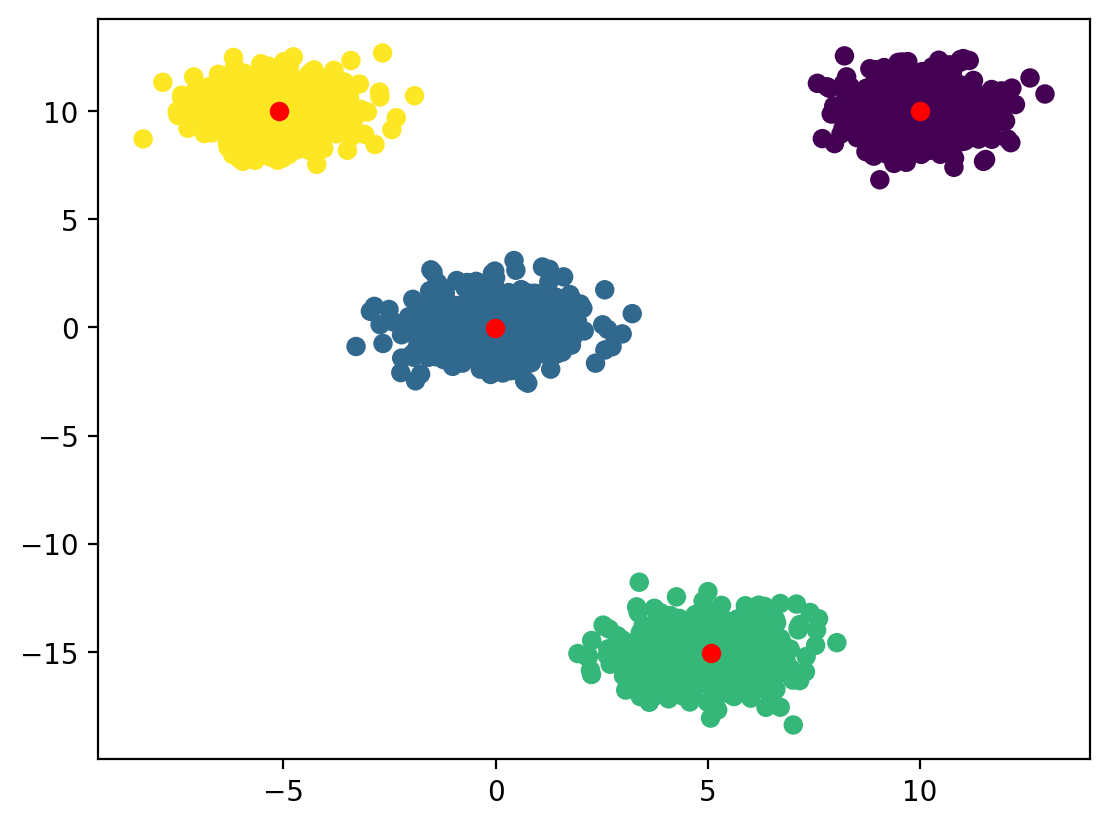

In [34]:
plt.scatter(data[:,0],data[:,1],c=cl)
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],c='red')

In [42]:
km1

0.0001